# PHYS 411 - Homework 2
You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%202.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%202.ipynb)

When you are finished with your work, please print to a PDF file and submit via canvas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Problem 1 - Measuring Rydberg's Constant
Below you have some spectroscopic data from Hydrogen, given as measured wavelength in (nm). You might notice that the lines are in three groups, which I have separated out for you already, and colored blue, green, and red (for illustrative purposes only).

1. Assign pairs of principal quantum numbers $(n, n')$ to each of these transition lines
2. plot $1/\lambda$ against $(1/n^2-1/n'^2)$. You should fine a straight line if your assignments are good.
3. Then fit the slope of this line (use you can use `slope, offset = np.polyfit(x, y, 1)`). Compare your slope with the Rydberg constant $R_\infty = 10973731.568160~\text{m}^{−1}$.
4. Your data is for the Hydrogen atom, so the slope should actually be the mass corrected $R_\text{H}$. Use the reduced mass of Hydrogen to calculate $R_\infty$ from the data. Speculate about the source of any remaining difference

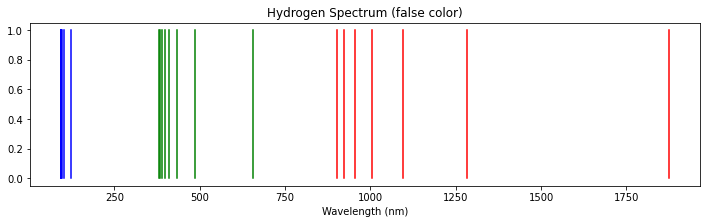

In [2]:
# all data are lines in (nm)
spectroscopy_data = [
    # first group
    [92.0947,
    92.3148,
    92.6249,
    93.0751,
    93.7814,
    94.9742,
    97.2517,
    102.5728,
    121.56701],
    # secound group
    [379.8987,
    383.6485,
    389.0166,
    397.1198,
    410.2892,
    434.1692,
    486.271,
    656.46],
    # third group
    [901.78,
    923.22,
    954.88,
    1005.26,
    1094.117,
    1282.1578,
    1875.64]
]

plt.figure(figsize=(12,3))
for group, color in zip(spectroscopy_data, ['b', 'g', 'r']):
    for line in group:
        plt.plot([line, line], [0, 1], color=color)
plt.xlabel('Wavelength (nm)');
plt.title('Hydrogen Spectrum (false color)');

# Problem 2 - Spherical Harmonics
We can define the spherical harmonic functions $Y_{lm}(\theta,\phi)$ using the `scipy.special` function [`sph_harm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html). Note that this function switches the definition of polar and azimuthal angle. I've defined a function `Y_lm(l, m, theta, phi)` that follows the definition in class.

For all of the spherical harmonics up to $l=3$, plot
1. a polar plot through the equitorial plane ($\theta=\pi/2$) of the real part squared 
2. a polar plot through the azimuthal plane ($\phi=0$) of the real part squared
3. a 3d projection of the real part on the surface of a sphere

I've included sample figures for $Y_{20}$. Please label your figures appropriately.

In [3]:
import scipy.special
def Y_lm(l, m, theta, phi):
    return scipy.special.sph_harm(m, l, phi, theta)

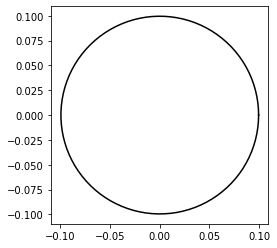

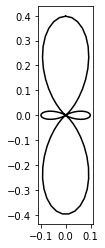

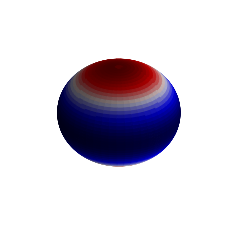

In [4]:
from matplotlib import cm, colors

def plot_3d_projection(l, m):
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    Y = Y_lm(l, m, theta, phi)
    Y = Y.real
    Y -= np.min(Y)
    Y /= np.max(Y)

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, facecolors=cm.seismic(Y))
    ax.set_axis_off()
    
def plot_equitorial_plane(l, m):
    theta = np.pi/2
    phi = np.linspace(0, 2*np.pi, 100)
    
    r = Y_lm(l, m, theta, phi).real**2
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    fig = plt.figure()
    plt.plot(x, y, 'k')
    plt.gca().set_aspect('equal')
    
def plot_azimuthal_plane(l, m):
    theta = np.linspace(0, 2*np.pi, 100)
    phi = 0
    
    r = Y_lm(l, m, theta, phi).real**2
    x = r*np.sin(theta)
    y = r*np.cos(theta)
    fig = plt.figure()
    plt.plot(x, y, 'k')
    plt.gca().set_aspect('equal')
    
plot_equitorial_plane(2, 0)
plot_azimuthal_plane(2, 0)
plot_3d_projection(2,0)

# Problem 3 - Radial Solution
Here we will compare the radial solution to hydrogen, obtaining it one way by directing numerically solving the differential equation
$$ \frac{\text{d}^2P}{\text{d}\rho^2} = \left( \frac{l(l+1)}{\rho^2} + 1 - \frac{2n}{\rho}\right) P$$,
where $P(r) = r R(r)$, and $rho = r/(n a_0)$.

I've written a function that will calculate $R(r)$ by solving this differential equation.

1. Compare the solution from `solve_radial(n, l, r)` to the explicit solution (for hydrogen) `R(n, l, r)` for several values of $n$ and $l$, and show that they are the same, up to normalization, by plotting each.
2. The radial probability density for the electron is $r^2 R(r)^2$, and it should obey the normalization condition
$$ \int_0^\infty \text{d}r~r^2 R(r)^2 = 1$$
modify the function `solve_radial` to output a normalized radial wavefunction. You can use `scipy.integrate.trapezoid(y, x)` to numerically integrate $y(x)$. You will want to integrate the radial wavefunction and then divide by the square root of this constant. Check that the output of `solve_radial` now obeys the normalization condition.
3. Plot the radial probability density for the 6 $n, l$ states up to and including $n=3, l=2$.
4. Use `solve_radial` to calculate the probability that the electron is *inside* the nucleus. The proton radius is 0.877 femtometers. Calculate this probability for 6 $n, l$ states up to and including $n=3, l=2$. Comment on your findings.

0.9999960859258356

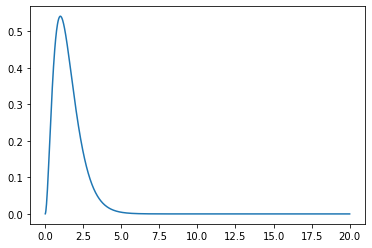

In [5]:
from scipy.integrate import solve_ivp, trapezoid
from math import factorial

def solve_radial(n, l, r):
    def dP(rho, P, n, l):
        return np.array([P[1], (l*(l+1)/rho**2+1-2*n/rho) * P[0]])

    rho = r/n
    rho = rho[::-1] 
    sol = solve_ivp(dP, t_span=[rho[0], rho[-1]], t_eval=rho, y0=[0, 1], args=(n, l))
    P = sol.y[0][::-1]
    R = P/r
    # add a line here to normalize R
    return R

def R(n, l, r):
    rho = 2*r/n
    A = np.sqrt((2/n)**3*factorial(n-l-1)/(2*n*factorial(n+l)))
    L = scipy.special.genlaguerre(n-l-1, 2*l+1)
    return A * rho**l * np.exp(-rho/2) * L(rho)

r = np.linspace(0.01, 20, 1000)
# plotting the radial probability density
plt.plot(r, r**2*R(1, 0, r)**2)
# the function R(n, l, r) is normalized
scipy.integrate.trapezoid(r**2 * R(1, 0, r)**2, r)

# Problem 4 - Transitions
I've used the radial wavefunction and the spherical harmonic functions to define a function `psi(n, l, m, r, theta, phi)` for the hydrogen atom. I've also written a function `integrate_angle` that will integrate over the angular coordinates.

1. Verify that this wavefunction is normalized, that if you integrate $r^2 sin(\theta) |\psi|^2$ you get 1. (you will need to use `trapezoid` to integrate `r3**2 * np.sin(theta3) * np.abs(psi)**2`).
2. Calculate the wavefunction $\Psi(t) = \sqrt{\frac{10}{11}}\psi_{1,0,0}e^{-i E_1 t/\hbar} + \sqrt{\frac{1}{11}} \psi_{2,1,1} e^{-i E_2 t/\hbar}$, where $E_n$ is the energy of the $\psi_{nlm}$, and plot the radial probability density for several different times
3. Calculate $\psi_{1,0,0} x \psi_{2,1,1}$, integrate over the radial coordinates and plot as a function of $r$. Also calculate $\psi_{1,0,0} z \psi_{2,1,1}$ (it should be zero). Remember that you will need to calculate `x = r3 * np.sin(theta3) * np.cos(phi3)` and `z = r3 * np.cos(theta3)`.
4. Integrate over $r$ to calculate the matrix element. Include the time dependence $\psi_{1,0,0}e^{-i E_1 t/\hbar}$ and $\psi_{2,1,1} e^{-i E_2 t/\hbar}$ and show that it oscillates in time at an angular frequency given by $\omega = (E_2-E_1)/\hbar$. What wavelength corresponds with this frequency?

In [6]:
r = np.linspace(0, 20, 200)
phi = np.linspace(0, 2*np.pi, 300)
theta = np.linspace(0, np.pi, 400)

r3, theta3, phi3 = np.meshgrid(r, theta, phi)

def psi(n, l, m, r, theta, phi):
    return R(n, l, r) * Y_lm(l, m, theta, phi)

def integrate_angle(f, theta, phi):
    return trapezoid(trapezoid(f, phi, axis=2), theta, axis=0)